In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import rasterio
from rasterio.plot import show

In [3]:
data = pd.read_csv("C:/Users/user/Downloads/Flood ML/Red River Manitoba/Red_River_Flood_Samples.csv")

In [6]:
X = data[['DEM_cut_rs', 'Soil_types', 'River_dens', 'Distance_t', 'Land_use_2', 'Curve_Stud', 'Aspect_Stu', 'Slope_Stud']]
y = data['Flood_Binary']

# Split dataset into 70% Training, 30% Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
# Classification and Regression Tree (CART)
FloodTrees = DecisionTreeClassifier()
# Train Decision Tree Classifer
FloodTrees = FloodTrees.fit(X_train,y_train) 
#Predict the response for test dataset 
y_pred = FloodTrees.predict(X_test) 

In [8]:
print("Accuracy:",accuracy_score(y_test, y_pred)) 

Accuracy: 0.81


AUC: 0.8100355834321762


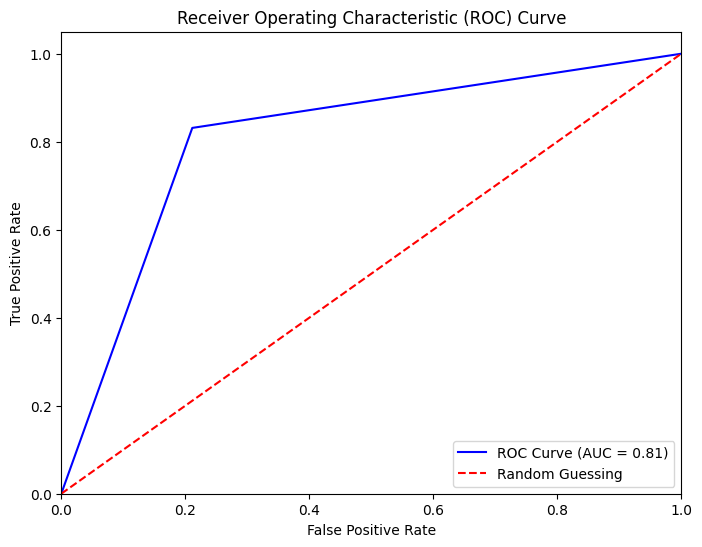

In [9]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [12]:
# Creating Map
fulldata = pd.read_csv("C:/Users/user/Downloads/Flood ML/Red River Manitoba/FullData.csv")
PredictCART = FloodTrees.predict(fulldata[['DEM_cut_rs', 'Soil_types', 'River_dens', 'Distance_t', 'Land_use_2', 'Curve_Stud', 'Aspect_Stu', 'Slope_Stud']])

# CART MAP
xyz_CART = pd.DataFrame({'x': fulldata['POINT_X'], 'y': fulldata['POINT_Y'], 'Flood_suscept': PredictCART})
xyz_CART.to_csv("xyz_CART.csv")


In [16]:
# Read the CSV file
xyz_CART = pd.read_csv("C:/Users/user/Downloads/Flood ML/xyz_CART.csv")

# Extract x, y, and Flood_suscept columns
x = xyz_CART['x']
y = xyz_CART['y']
flood_suscept = xyz_CART['Flood_suscept']

# Define raster dimensions
width = 1000
height = 1000


# Normalize coordinates to fit within the raster dimensions
x_normalized = (x - min(x)) / (max(x) - min(x)) * (width - 1)  # Adjusted to (width - 1)
y_normalized = (y - min(y)) / (max(y) - min(y)) * (height - 1)  # Adjusted to (height - 1)

# Create an empty raster 
raster = np.zeros((height, width), dtype=np.float32)

# Assign flood susceptibility values to the corresponding raster cells
for x_coord, y_coord, value in zip(x_normalized, y_normalized, flood_suscept):
    raster[int(y_coord), int(x_coord)] = value

# Write the raster to a GeoTIFF file
with rasterio.open("output.tif", "w", driver="GTiff", width=width, height=height, count=1, dtype=np.float32,) as dst:
    dst.write(raster, 1)


c:\Users\user\anaconda3\envs\floodmap\lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


c:\Users\user\anaconda3\envs\floodmap\lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


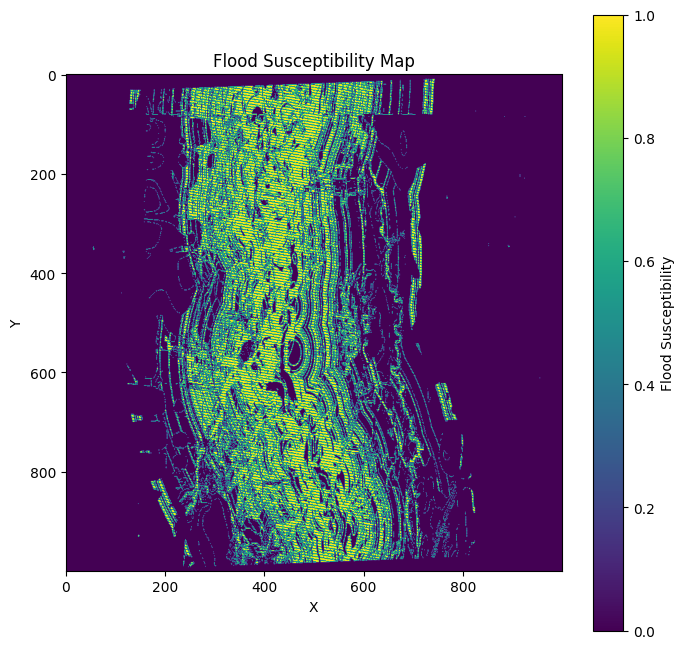

In [17]:
# Read the raster image
with rasterio.open("C:/Users/user/Downloads/Flood ML/output.tif") as src:
    raster = src.read(1)

# Plot the raster image
plt.figure(figsize=(8, 8))
plt.imshow(raster, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Flood Susceptibility')
plt.title('Flood Susceptibility Map')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

c:\Users\user\anaconda3\envs\floodmap\lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


TypeError: Non geometry data passed to GeoSeries constructor, received data of dtype 'object'